In [21]:
#Make the imports

import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sqlalchemy import create_engine
from sklearn.preprocessing import LabelEncoder

import warnings

warnings.filterwarnings('ignore')



postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user,postgres_pw, postgres_host, postgres_port, postgres_db))

houseprice_df = pd.read_sql_query('select * from houseprices', con=engine)

engine.dispose()

In [37]:
hp2_df = houseprice_df.copy()

houseprice_df.head(15)



label_encoder = LabelEncoder()
for column in hp2_df.select_dtypes(include=['object']).columns:
    hp2_df[column] = label_encoder.fit_transform(hp2_df[column])

houseprice_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [35]:
#2
rows, cols = hp2_df.shape

print (rows, cols)
#3 
data_types = houseprice_df.dtypes

type_counts = data_types.value_counts()

print (type_counts)


1460 81
object     43
int64      35
float64     3
Name: count, dtype: int64


In [61]:
#5
missing_houseprice_df = houseprice_df.isnull().sum()

missing_houseprice_df.head(40)


id                 0
mssubclass         0
mszoning           0
lotfrontage      259
lotarea            0
street             0
alley           1369
lotshape           0
landcontour        0
utilities          0
lotconfig          0
landslope          0
neighborhood       0
condition1         0
condition2         0
bldgtype           0
housestyle         0
overallqual        0
overallcond        0
yearbuilt          0
yearremodadd       0
roofstyle          0
roofmatl           0
exterior1st        0
exterior2nd        0
masvnrtype         8
masvnrarea         8
exterqual          0
extercond          0
foundation         0
bsmtqual          37
bsmtcond          37
bsmtexposure      38
bsmtfintype1      37
bsmtfinsf1         0
bsmtfintype2      38
bsmtfinsf2         0
bsmtunfsf          0
totalbsmtsf        0
heating            0
dtype: int64

Text(0.5, 1.0, 'Distribution of Housing Sale Price')

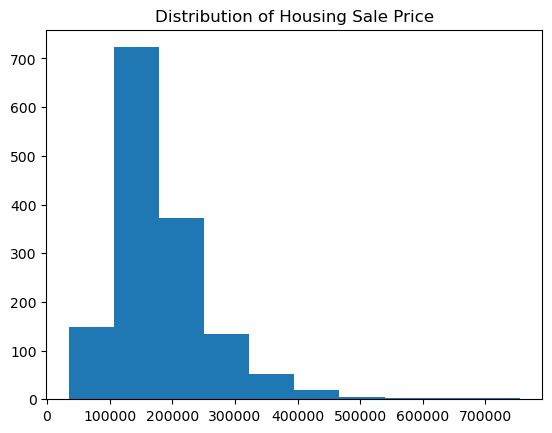

In [63]:
#6 saleprice distribution 

saleprice_distro = houseprice_df['saleprice']

plt.hist(saleprice_distro)
plt.title('Distribution of Housing Sale Price')